In [14]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from generateFatTree import FatTree

# Generación de la topologia
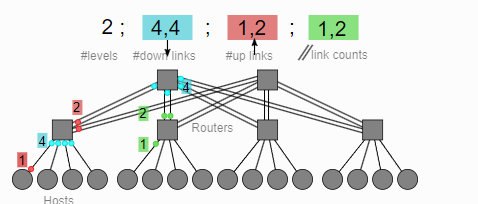

Primer paso es generar el Fat Tree a utilizar en la plataforma. La clase ´FatTree´ recibe los siguientes parametros:
- levels: Int
- Down links: list[int]
- Up links: list[int]
- Link Count: list[int]
- Debug: Bool

In [16]:
arqui1 = FatTree(2,[4,4],[1,2],[1,2], True)
arqui1.generate()

[+] Creating 16 nodes
[+] Routers by level [4, 2]
[+] Creating router r10
[+] Creating router r11
[+] Creating router r12
[+] Creating router r13
[+] Creating router r20
[+] Creating router r21
('r10-c0', {'src': 'r10', 'dst': 'c0', 'up': 1, 'dn': 1})
('r10-c1', {'src': 'r10', 'dst': 'c1', 'up': 1, 'dn': 1})
('r10-c2', {'src': 'r10', 'dst': 'c2', 'up': 1, 'dn': 1})
('r10-c3', {'src': 'r10', 'dst': 'c3', 'up': 1, 'dn': 1})
('r11-c4', {'src': 'r11', 'dst': 'c4', 'up': 1, 'dn': 1})
('r11-c5', {'src': 'r11', 'dst': 'c5', 'up': 1, 'dn': 1})
('r11-c6', {'src': 'r11', 'dst': 'c6', 'up': 1, 'dn': 1})
('r11-c7', {'src': 'r11', 'dst': 'c7', 'up': 1, 'dn': 1})
('r12-c8', {'src': 'r12', 'dst': 'c8', 'up': 1, 'dn': 1})
('r12-c9', {'src': 'r12', 'dst': 'c9', 'up': 1, 'dn': 1})
('r12-c10', {'src': 'r12', 'dst': 'c10', 'up': 1, 'dn': 1})
('r12-c11', {'src': 'r12', 'dst': 'c11', 'up': 1, 'dn': 1})
('r13-c12', {'src': 'r13', 'dst': 'c12', 'up': 1, 'dn': 1})
('r13-c13', {'src': 'r13', 'dst': 'c13', 'up':

[16, 4, 2]


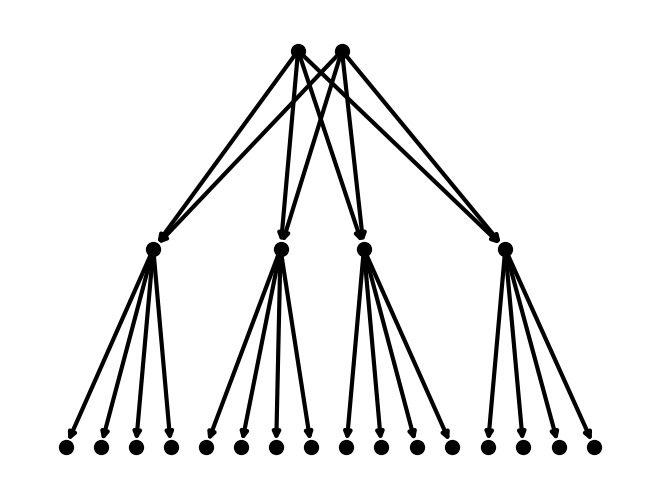

In [17]:
print(arqui1.nodes_by_level)
arqui1.draw()

[16, 4, 4, 4]


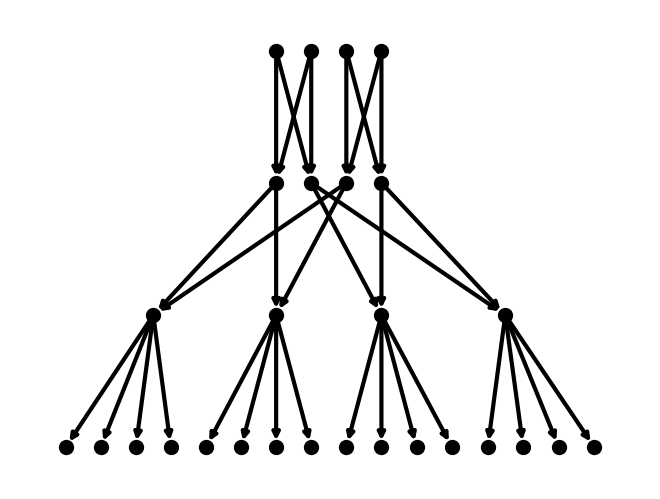

In [18]:
arqui2 = FatTree(3,[4,2,2],[1,2,2],[1,2,1],False)
arqui2.generate()
print(arqui2.nodes_by_level)
arqui2.draw()

# Selecting the hw specs
Despues de generar el fat tree, 
1. node_types.json
2. 

## DFVS

attributes
- speed: Computational power (per core, in flop/s). **If you use DVFS, provide a comma-separated list of values for each pstate**
- pstate
  
properties
- wattage_per_state
- wattage_off
- sleep_pstates

In [19]:
%%writefile node_types.json
{
    "node_A": {
        "_coment": [
            "pstate values:",
            "* 0-2: real pstates",
            "0: p1 100 MFlops/s, [idle: 95W -> full burning: 200W]",
            "1: p2  50 MFlops/s, [idle: 93W -> full burning: 170W]",
            "2: p3  20 MFlops/s, [idel: 90W -> full burning: 150W]"
        ],
        "attributes": { "speed": "100.0Mf,50.0Mf,20.0Mf", "pstate": "0" },
        "properties": [
            { "id": "wattage_per_state", "value": "95.0:200.0,93.0:170.0,90.0:150.0" },
            { "id": "wattage_off", "value": "2.0" }
        ]
    },
    "node_B": {
        "attributes": { "speed": "10.0Gf, 0.05f", "pstate": "0" },
        "properties": [
            { "id": "wattage_per_state", "value": "10.0:100.0:7.0, 9.75:5:7.25" },
            { "id": "wattage_off", "value": "2.0" }
        ]
    },
    "node_C": {
        "attributes": { "speed": "20.4Gf, 18.36Gf, 16.32Gf, 14.28Gf, 12.24Gf, 0.0Gf, 0.0Gf, 0.0Gf", "pstate": "0" },
        "properties": [
            { "id": "sleep_pstates", "value": "5:6:7"},
            { "id": "wattage_per_state", "value": "5.0:14.375, 5.0:12.9375, 5.0:11.5, 5.0:10.0625, 5.0:8.625, 2.0:2.0, 7.0:7.0, 6.0:6.0" },
            { "id": "wattage_off", "value": "2.0" }
        ]
    }
}

Overwriting node_types.json


In [20]:
%%writefile network_types.json
{

}

Overwriting network_types.json


In [21]:
%%writefile test02.json
{
    "nodes": [
        { "type": "node_A", "number": "6" },
        { "type": "node_B", "number": "10" }
    ],
    "cluster_network": "Network A",
    "dc_network": "Network A"
}

Overwriting test02.json


# Generating the plaform file

In [22]:
from generateFatTree import FileInterface

In [23]:
PLATFORM_IN  = "test02.json"
PLATFORM_OUT = "generated.xml"

iface = FileInterface(PLATFORM_IN, PLATFORM_OUT)
iface.write(arqui1)

In [24]:
!cat generated.xml

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE platform
  SYSTEM 'https://simgrid.org/simgrid.dtd'>
<platform version="4.1">
    <zone id="main" routing="Full">
        <zone id="cluster_compute" routing="Full">
            <host speed="100.0Mf,50.0Mf,20.0Mf" pstate="0" id="c0">
                <prop id="wattage_per_state" value="95.0:200.0,93.0:170.0,90.0:150.0"/>
                <prop id="wattage_off" value="2.0"/>
                <prop id="type" value="node_A"/>
            </host>
            <host speed="100.0Mf,50.0Mf,20.0Mf" pstate="0" id="c1">
                <prop id="wattage_per_state" value="95.0:200.0,93.0:170.0,90.0:150.0"/>
                <prop id="wattage_off" value="2.0"/>
                <prop id="type" value="node_A"/>
            </host>
            <host speed="100.0Mf,50.0Mf,20.0Mf" pstate="0" id="c2">
                <prop id="wattage_per_state" value="95.0:200.0,93.0:170.0,90.0:150.0"/>
                <prop id="wattage_off" value="2.0"/>
                <prop

In [25]:
!cp generated.xml ../../platforms/fat_tree.xml